# Statistics (Computer Programming)
<br>
<hr> 

### Statistics 는 불확실성에서의 주어진 정보에서 지식을 확장시키는데 도움을 준다.
##### population : 추출된 표본의 전체 집단 
##### Sample : Population에서 일정 크기만큼 임의로 추출된 집단
##### Observation : Population에서 임의로 추출된 개별 데이터<br>
##### Domain : Observation이 갖는 고유 값들의 집합
##### Random Variable : Domain의 값을 Observation에 할당해주는 함수 X/x
##### Random Selection을 사용하는 이유 : 편향된 그룹이 되는 것을 피하기 위해
##### Probability Distribution : 어떤 값이 나올 확률을 요약해놓은 것<br>
##### PMF (Probability Mass Function) : Discrete Distribution을 나타내주는 함수
##### PDF (Probability Density Function) : 특정 값에 대한 Probability Density (Likelihood) 를 나타내주는함수
##### Parameter : Population의 특성 ,, Statistic : Sample의 측정 가능한 특성
##### test statistic : 가설 검정에서 sample이 얼마나 극단적인지 나타내주는 지표
##### CDF (Cumulative Distribution Function) : 특정 값보다 작은 값이 나올 확률을 나타내주는 함수
##### SF (Survival Function) : 특정 값보다 큰 값이 나올 확률을 나타내주는 함수
##### PPF (Percentile Point Function) : 특정 백분위 값에 대응하는 value를 나타내주는 함수

## PDF, CDF, SF, PPF, ISF의 표현 (Standard Normal Distribution)

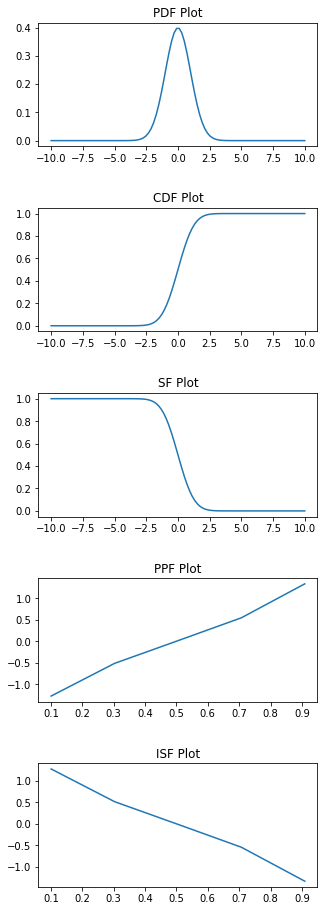

In [74]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

norm_dist = stats.norm(loc=0, scale=1)
x = np.linspace(-10,10,100)
f_list = [norm_dist.pdf(x),norm_dist.cdf(x),norm_dist.sf(x),norm_dist.ppf(x),norm_dist.isf(x)]
name_list = ['PDF','CDF','SF','PPF','ISF']
fig, axes = plt.subplots(5,1,figsize=(5,15))
for name,f,ax in zip(name_list,f_list,axes):
    ax.set_title("{} Plot".format(name))
    ax.plot(x,f)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)    
plt.show()

## Distribution Center
#### Mean : 집단의 센터
#### Median : 집단의 중간 위치 값
#### Mode : 집단의 최빈값
<br><br>
## Distribution Variability
#### Range : Max - Min => Outlier의 영향으로 Distribution 에 대한 오해를 불러일으킬 수 있다.
#### IQR (Inter Quartile Range) : 해당 그룹의 75 Percentile - 25 Percentile
#### Variance (분산) : Sum of Square/Degrees of Freedom
*Degrees of Freedom (자유도) : 동일한 데이터 셋에서 자유롭게 값을 가질 수 있는 Observation 수
#### Standard Deviation (표준편차) : Sqrt(Variance)

In [75]:
import numpy as np
from scipy import stats

sample = [5,2,3,4,1,2,5,1,1]
print("Sample Mean : {}".format(np.mean(sample)))
print("Sample Median : {}".format(np.median(sample)))
print("Sample Mode : {} \n\n".format(stats.mode(sample)[0][0]))

print("Range : {}".format(max(sample)-min(sample)))
print("IQR 'Inter Quartile Range' : {}".format(np.percentile(sample,75)-np.percentile(sample,25)))
print("Variance : {}".format(np.var(sample,ddof=1)))
print("Standard Deviation : {}".format(np.std(sample,ddof=1)))

Sample Mean : 2.6666666666666665
Sample Median : 2.0
Sample Mode : 1 


Range : 4
IQR 'Inter Quartile Range' : 3.0
Variance : 2.7500000000000004
Standard Deviation : 1.6583123951777001


## Statistical Data Analysis
#### 1. Hypothesis Test (Top Down Approach) : Population의 특정한 가설에 대해서 주어진 샘플이 얼마나 얻어질 법 한지 확인하는 검정
#### 2. Statistical Modeling (Bottom Up Approach)
#### (가설 검정에 대해서만 다룬다.)<br><br>


### One Sample Test : 한 그룹의 Center와 특정값을 비교하는 검정
### Two Sample Test : 두 샘플이 같은 population에서 왔는지 확인하는 검정으로, 두 샘플의 Center을 비교한다.

### Hypothesis Test 의 3 단계
##### 1. 가설을 정의한다.
##### 2. Sample에서 test statistic을 구한다.
*test statistic : 가정한 가설에서 Sample이 얼마나 극단적인지를 표현해주는 지표
##### 3. test statistic이 가정한 가설에서 얼마나 얻어질 법 한지 확인한다.

## One Sample z-test (z-test는 Standard Normal Distribution을 따른다.)

In [76]:
pop_mean = 18
pop_sd = 3

sample = [22, 16, 20, 16, 26, 15, 20, 15, 17, 22, 15, 25, 19, 18, 16, 13, 29, 27, 21, 19, 23, 22, 12, 22, 17, 16, 15, 19, 17, 24]
n = len(sample)

### 1. 가설을 정의한다.
#### H0 : pop_mean = 18
#### H1 : pop_mean != 18
pop_mean is assumed value

### 2. Sample에서 test statistic 값을 구한다.

In [77]:
sample_error = np.mean(sample)-pop_mean
SE = np.std(sample,ddof=1)/np.sqrt(n)

z = sample_error/SE
print("Test Statistic : {}".format(z))

Test Statistic : 1.6261471750763632


### 3. test statistic이 가정한 확률 분포에서 얼마나 얻어질 법 한지 확인한다.

#### P-Value : 귀무가설이 참이라는 가정 하에 sample에서 얻어진 test statistic 만큼, 보다 더 극단적인 값을 갖을 확률
*Alternative Hypothesis (대립가설) : 내가 주장하고자 하는 가설
*Null Hypothesis (귀무가설) : 대립가설에 대립하는 가설
#### Signifance Level : 귀무가설이 참이라는 가정하에 귀무가설이 기각될 확률, 주어진 P-Value가 극단적인지를 판단하는 값이 된다.


P-Value : 0.10391835048464519
Null Hypothesis is Accepted


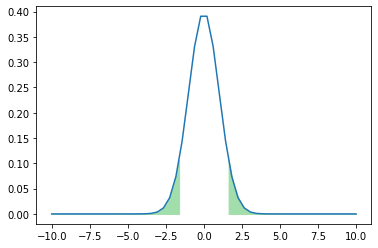

In [78]:
norm_dist = stats.norm(loc=0, scale=1)
pv = norm_dist.sf(abs(z))*2
print("P-Value : {}".format(pv))
sig = 0.05
if sig>pv:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')
    
# Plot
x = np.linspace(-10,10)
y = norm_dist.pdf(x)
plt.plot(x,y)
right = np.linspace(abs(z),x[-1])
left = np.linspace(-x[-1],-abs(z))
plt.fill_between(right, norm_dist.pdf(right),color="#a2deab")
plt.fill_between(left, norm_dist.pdf(left),color="#a2deab")
plt.show()

## One Sample Z-Test의 조건
#### 모분산의 표준편차, 분산을 알아야한다.
#### 표본의 평균에 대한 분포가 정규분포를 따라야한다. -> Normality Check

## Normality Check
#### 1. CLT (Central Limit Theorem 중심 극한 정리) : 표본의 크기가 충분히 크면 (n>=30) 표본의 평균에 대한 분포는 정규분포를 따른다.

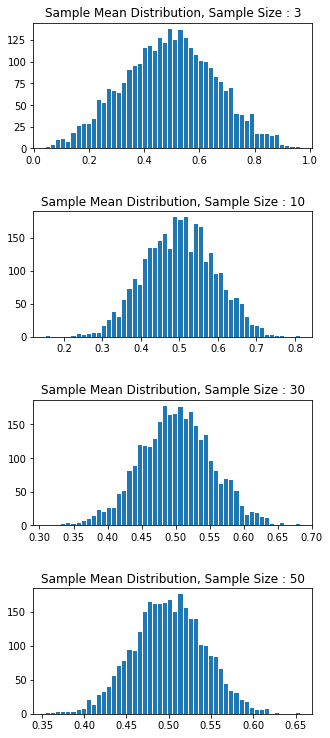

In [79]:
uni_dist = stats.uniform()
sample_size = [3,10,30,50]
fig, axes = plt.subplots(4,1,figsize=(5,12))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
x = np.linspace(-10,10,100)
for n,ax in zip(sample_size,axes):
    result = []
    
    for _ in range(3000):
        result += [np.mean(uni_dist.rvs(size=n))]
    ax.set_title("Sample Mean Distribution, Sample Size : {}".format(n))
    ax.hist(result,bins=50,rwidth=0.8)
plt.show()

## Normality Check
#### 2. Visual Inspection (QQ Plot, PP Plot, Probability Plot)
#### Probability plot : 정렬된 Dataset의 값들과 특정한 Distribution의 Quantile 대응했을 때 y=x 그래프와 유사한지 판단|

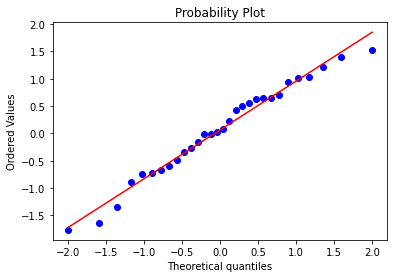

In [80]:
norm_dist = stats.norm(loc=0, scale=1)
norm_sample = norm_dist.rvs(size=30)

_ = stats.probplot(norm_sample,plot=plt,dist='norm')

## Normality Check
#### 3. Statistical Test 
1. 특정 분포와 best fit 한 지를 검정
2. Sample data의 통계적 지표를 가지고 가설검정 하는 것 (D.Agostino Pearson Omnibus test를 중점으로 다룬다.)

In [81]:
_stat, _p = stats.normaltest(norm_sample)
print(_p)
if _p>0.05:
    print("주어진 샘플은 Normal Distribution을 따른다.")
else:
    print("주어진 샘플은 Normal Distribution을 따르지 않는다.")

0.6100239504641344
주어진 샘플은 Normal Distribution을 따른다.


## Pitfall Of Hypothesis Test
#### 1. Error
 : 1. Type 1 Error (false Positive) : 귀무가설이 참일 때 귀무가설을 기각한 경우 (Significance Level) <br>
 : 2. Type 2 Error (false Negative) : 귀무가설이 거짓일 때 귀무가설을 Accept 한 경우 <br>
#### 2. Sample Size
 : sample size가 크면 Standard Error가 작아져서 기각 되기 쉬워진다. 그리고 sample size가 작은 경우 sample mean을 구할 때 outlier의 영향을 받아 Sample error가 커져서 기각 되기 쉬워진다.
#### 3. Magnititude of Difference
 : 가설 검정에서는 판단은 할 수 있지만 그 다름의 크기를 알 수 없다 -> Effect size (Cohen's d)

## One Sample t-test (t-test는 T Distribution을 따른다.)

Population의 분산 및 표준편차를 알 수 없다면 t test를 사용한다.

In [82]:
pop_mean = 4.5
# Here is a sample from the population.
sample = [3.7, 4.9, 4.5, 4.5, 3.1, 4.0, 2.7, 3.5, 6.3, 3.7, 3.5, 4.0, 4.1, 5.5, 4.3, 5.2, 3.1, 3.0, 3.7, 2.6]

### 1. 가설을 정의한다.
#### H0 : pop_mean = 4.5
#### H1 : pop_mean != 4.5
pop_mean is assumed value

### 2. Sample에서 test statistic 값을 구한다.

In [83]:
sample_error = np.mean(sample)-pop_mean
SE = np.std(sample, ddof=1)/np.sqrt(len(sample))
t = sample_error/SE
print("test statistic : {}".format(t))

test statistic : -2.357983230116091


### 3. test statistic이 가정한 확률 분포에서 얼마나 얻어질 법 한지 확인한다.
가정한 t distribution의 속성으로 df(샘플의 자유도)를 지정해줘야한다.
df가 커질수록 t distribution은 표준정규분포에 가까워진다.

#### P-Value : 귀무가설이 참이라는 가정 하에 sample에서 얻어진 test statistic 만큼, 보다 더 극단적인 값을 갖을 확률
*Alternative Hypothesis (대립가설) : 내가 주장하고자 하는 가설
*Null Hypothesis (귀무가설) : 대립가설에 대립하는 가설
#### Signifance Level : 귀무가설이 참이라는 가정하에 귀무가설이 기각될 확률, 주어진 P-Value가 극단적인지를 판단하는 값이 된다.


In [84]:
t_dist = stats.t(df=len(sample)-1)

pv = t_dist.sf(abs(t))*2
print("P-Value : {}".format(pv))
sig = 0.05
if sig>pv:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')


P-Value : 0.02924529358349075
Null Hypothesis is Rejected


#### Cohen's d (EFFECT SIZE)

In [85]:
d = abs(sample_error)/np.std(sample,ddof=1)
print("Cohen's d : {}".format(d))

Cohen's d : 0.5272610792344109


## Paired t-test = Within subject Study = Dependent sample t test (t-test는 T Distribution을 따른다.)

*Dependent : 한 그룹의 데이터가 다른 그룹과 연관 있을 경우
*같은 subject에 시간적 요소가 다른 경우
*같은 subject의 Before After 비교

### Two Sample t test : 두 그룹이 동일한 population에서 왔는지, 두 샘플의 센터를 비교

Population의 분산 및 표준편차를 알 수 없다면 t test를 사용한다.

In [86]:
 # Here are two samples that are related (paired).
sample1 = [0.46, 8.58, 6.22, 4.02, -0.28, 2.23, -0.70, 6.16, -2.01, 6.78, 2.70, 1.07, 3.09, 1.62, -1.40, 3.28, 5.88, -2.98, 8.02, 2.57, 2.19, 2.88, 2.56, 5.57, 2.36, 4.02, 1.34, 1.26, 2.68, 5.68]
sample2 = [5.04, 5.77, 5.71, 3.47, 1.46, 5.48, 5.52, 4.59, 5.15, 1.97, 3.68, 5.13, 4.73, 4.13, 2.87, 4.80, 5.60, 3.16, 7.14, 4.31, 3.98, 3.82, 5.05, 2.49, 1.85, 2.76, 2.02, 2.72, 4.85, 4.92]

# Question: Is there a significant difference between the two samples?

### 1. 가설을 정의한다.
#### H0 : Before pop_mean = After pop_mean
#### H1 : Before pop_mean != After pop_mean

### 2. Sample에서 test statistic 값을 구한다.

In [87]:
sample_d = np.array(sample1)-np.array(sample2)
print(sample_d)

sample_error = sample_d.mean()
SE = sample_d.std(ddof=1)/len(sample_d)
t = sample_error/SE
print("test statistic : {}".format(t))

[-4.58  2.81  0.51  0.55 -1.74 -3.25 -6.22  1.57 -7.16  4.81 -0.98 -4.06
 -1.64 -2.51 -4.27 -1.52  0.28 -6.14  0.88 -1.74 -1.79 -0.94 -2.49  3.08
  0.51  1.26 -0.68 -1.46 -2.17  0.76]
test statistic : -13.675727401147686


### 3. test statistic이 가정한 확률 분포에서 얼마나 얻어질 법 한지 확인한다.
가정한 t distribution의 속성으로 df(샘플의 자유도)를 지정해줘야한다.
df가 커질수록 t distribution은 표준정규분포에 가까워진다.

In [88]:
t_dist = stats.t(df=len(sample)-1)

pv = t_dist.sf(abs(t))*2
print("P-Value : {}".format(pv))
sig = 0.05
if sig>pv:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')

P-Value : 2.7649829370881408e-11
Null Hypothesis is Rejected


#### Cohen's d (EFFECT SIZE)

In [89]:
d = abs(sample_error)/np.std(sample,ddof=1)
print("Cohen's d : {}".format(d))

Cohen's d : 1.333639904703803


## Unpaired t-test = Between Group Study = Independent sample t test (t-test는 T Distribution을 따른다.)
*independent : 한 그룹의 subject가 다른 그룹과 연관이 없을 때

In [90]:
s1 = [ 3.74, 3.37, 3.22, 3.85, 3.83, 3.22, 3.32, 3.23, 2.56, 3.64, 3.12, 3.33, 3.99, 3.04, 3.88, 2.73, 3.36, 3.50, 3.15, 2.72, 3.81, 3.34, 3.35, 3.09, 3.69, 3.73, 3.95, 3.20, 2.80, 3.41]
s2 = [3.40, 3.96, 3.64, 2.58, 3.88, 3.32, 3.38, 3.30, 3.24, 3.25, 3.20, 3.56, 3.18, 3.54, 3.60, 2.79, 3.62, 3.74, 3.36, 3.75, 3.66, 3.12, 3.44, 3.49, 3.22]

print(len(s1))
print(len(s2))

30
25


### 1. 가설을 정의한다.
#### H0 : A pop mean = B pop mean
#### H1 : A pop mean != B pop mean

### 2. Sample에서 test statistic 값을 구한다.

#### 두 샘플의 센터를 비교
#### 두 샘플이 동일한 분사을 갖는지 확인 (levene's test)
만약 동일한 분산을 갖는다면 pooled variance를 사용한다
*pooled variance : 두 샘플이 동일한 분산을 가질 때 더 정확하고 간략한 계산을 위해 구한 Total Variance 값이다.

만약 동일한 분산을 갖지 않는다면 Welch's t test를 수행한다.
*Welch's t test에서 t distribution의 파라미터 df는 특정 계산을 통한 m값으로 사용한다.

*stats.ttest_ind(sample1,sample2,equal_var=True)

In [91]:
is_equal_var = True
_stat, _p = stats.levene(s1,s2)
if _p<0.05:
    is_equal_var = False

var1 = np.var(s1, ddof=1)    
var2 = np.var(s2, ddof=1)

df1 = len(s1)-1
df2 = len(s2)-1
    
if is_equal_var==True:
    pooled_var = (df1*var1 + df2*var2)/(df1+df2)
    t_dist = stats.t(df=df1+df2)
    sample_error = np.mean(s1)-np.mean(s2)
    SE = np.sqrt(pooled_var)*np.sqrt(1/len(s1)+1/len(s2))
    t = sample_error/SE
    d = abs(sample_error)/pooled_var
# Welch's t test
else:
    m = (var1/len(s1) + var2/len(s2))**2/((var1/len(s1))**2/df1+(var2/len(s2))**2/df2)
    sample_error = np.mean(s1)-np.mean(s2)
    SE = np.sqrt(var1/len(s1)+var2/len(s2))
    t = sample_error/SE
    t_dist = stats.t(df=m)
    d = abs(sample_error)/np.sqrt((var1+var2)/2)
print("test statistic : {}".format(t))


test statistic : -0.38028538366273695


### 3. test statistic이 가정한 확률 분포에서 얼마나 얻어질 법 한지 확인한다.
가정한 t distribution의 속성으로 df(샘플의 자유도)를 지정해줘야한다.
df가 커질수록 t distribution은 표준정규분포에 가까워진다.

In [92]:
pv = t_dist.sf(abs(t))*2
print("P-Value : {}".format(pv))

if pv>0.05:
    print("H0 Accept")
else:
    print("H0 Reject")

P-Value : 0.7052534189072959
H0 Accept


#### Cohen's d (EFFECT SIZE)

In [93]:
print("Cohen's d : {}".format(d))

Cohen's d : 0.29082023826374154
